In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [2]:
#Loading Dataset
dataset=pd.read_csv('diabetes.csv')

In [3]:
#To Visualize Dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Check in missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#To count target datas 
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
#To split in features(X) and target(y)
X=dataset.drop(['Outcome'], axis=1)
y=dataset['Outcome'].values

In [7]:
#To balance target datas
from imblearn.over_sampling import SMOTE, ADASYN
smt = SMOTE()
Xb, yb = smt.fit_sample(X, y)

Using TensorFlow backend.


In [8]:
# To visualize balanced datas
Xb = pd.DataFrame(Xb,columns=X.columns)
yb = pd.DataFrame(yb,columns=['morte'])
balanced = Xb.join(yb)

print('Data shape after balancing:',balanced.shape)
print('\nCounts of Promising(1) VS Unpromising(0) in new data:')
print(balanced.morte.value_counts())

Data shape after balancing: (1000, 9)

Counts of Promising(1) VS Unpromising(0) in new data:
1    500
0    500
Name: morte, dtype: int64


In [9]:
# Importing more libraries to get best model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [11]:
#To scale dataset when it is necessary and showing datas scaled
scaler = StandardScaler()
xS = pd.DataFrame(scaler.fit_transform(Xb),columns = Xb.columns)
xS.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.580975,0.667997,0.135268,0.909296,-0.683246,0.128703,0.451133,1.341496
1,-0.905654,-1.258213,-0.162788,0.539037,-0.683246,-0.803059,-0.415591,-0.293845
2,1.175626,1.738114,-0.262140,-1.250552,-0.683246,-1.242319,0.592447,-0.207774
3,-0.905654,-1.135914,-0.162788,0.168777,0.085374,-0.603396,-0.993407,-1.154551
4,-1.202980,0.331675,-1.454362,0.909296,0.690458,1.393238,5.667181,-0.121704


# **Stage of Machine Learning Models

In [12]:
# four types
RF=RandomForestClassifier()
ex=ExtraTreesClassifier()
sv=svm.SVC()
kn=KNeighborsClassifier()

# **Training and predicting the models

In [13]:
# Extra Trees
from sklearn.metrics import confusion_matrix, classification_report
ex.fit(Xb,yb)
y_pred = cross_val_predict(ex, Xb, yb, cv=10)
print(accuracy_score(yb, y_pred))
print (classification_report(yb, y_pred))

0.824
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       500
           1       0.80      0.86      0.83       500

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



In [14]:
# Random Forest
from sklearn.metrics import confusion_matrix, classification_report
RF.fit(Xb,yb)
y_pred2 = cross_val_predict(RF, Xb, yb, cv=10)
print(accuracy_score(yb, y_pred2))
print (classification_report(yb, y_pred2))

0.817
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       500
           1       0.80      0.84      0.82       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



In [15]:
# SVM with datas scaled (xS)
from sklearn.metrics import confusion_matrix, classification_report
sv.fit(xS,yb)
y_pred3 = cross_val_predict(sv, xS, yb, cv=10)
print(accuracy_score(yb, y_pred3))
print (classification_report(yb, y_pred3))

0.783
              precision    recall  f1-score   support

           0       0.81      0.75      0.77       500
           1       0.76      0.82      0.79       500

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



In [17]:
# K-nearest neighbors
from sklearn.metrics import confusion_matrix, classification_report
kn.fit(xS,yb)
y_pred4 = cross_val_predict(kn, xS, yb, cv=10)
print(accuracy_score(yb, y_pred4))
print (classification_report(yb, y_pred4))

0.773
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       500
           1       0.75      0.82      0.78       500

    accuracy                           0.77      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.78      0.77      0.77      1000



# ** Stage of Tuning of models

In [18]:
# values
valores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
valor=[2,4,6,8,10]

# ** It Using GridSearchCV

In [34]:
grid_params_rf = [{
    'n_estimators':[200,400,500,600,700],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1,2,5],
    'max_depth': [8,10,14,20],
    'min_samples_split': [2,4,6]
}]

In [49]:
grid_params_ex = [{
    'n_estimators':[50,100,200,400,500],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1,2,5],
    'max_depth': [8,10,14,20],
    'min_samples_split': [2,4,5]
}]

In [26]:
grid_params_svm = [{
    'kernel': ['linear', 'rbf'], 
    'C': valores
}]

In [27]:
grid_params_knn = [{
    'n_neighbors': valores,
}]

In [35]:
gs_rf = GridSearchCV(
    estimator=RF,
    param_grid=grid_params_rf,
    scoring='accuracy',
    cv=10 
)

In [50]:
gs_ex = GridSearchCV(
    estimator=ex,
    param_grid=grid_params_ex,
    scoring='accuracy',
    cv=10 
)

In [29]:
gs_svm = GridSearchCV(
    estimator=sv,
    param_grid=grid_params_svm,
    scoring='accuracy',
    cv=10,
)

In [30]:
gs_knn = GridSearchCV(
    estimator=kn,
    param_grid=grid_params_knn,
    scoring='accuracy',
    cv=10,
)

In [36]:
gs_rf.fit(Xb,yb)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [8, 10, 14, 20],
                          'min_samples_leaf': [1, 2, 5],
                          'min_samples_split': [2, 4, 6],
                          'n_estimators': [200, 400, 500, 600, 700]}],
             scoring='accuracy')

In [39]:
#Getting best result
print('Melhores parâmetros: %s' % gs_rf.best_params_)
print('Melhores Acurácia: %.3f' % gs_rf.best_score_)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Melhores Acurácia: 0.822


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred5 = cross_val_predict(gs_rf.best_estimator_, Xb, yb, cv=10)
print(accuracy_score(yb, y_pred5))
print (classification_report(yb, y_pred5))

0.818
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       500
           1       0.80      0.84      0.82       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



In [51]:
gs_ex.fit(Xb,yb)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [8, 10, 14, 20],
                          'min_samples_leaf': [1, 2, 5],
                          'min_samples_split': [2, 4, 5],
                          'n_estimators': [50, 100, 200, 400, 500]}],
             scoring='accuracy')

In [52]:
print('Melhores parâmetros: %s' % gs_ex.best_params_)
print('Melhores Acurácia: %.3f' % gs_ex.best_score_)

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Melhores Acurácia: 0.834


In [60]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred6 = cross_val_predict(gs_ex.best_estimator_, Xb, yb, cv=10)
print(accuracy_score(yb, y_pred6))
print (classification_report(yb, y_pred6))

0.832
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       500
           1       0.81      0.87      0.84       500

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



In [54]:
gs_svm.fit(xS,yb)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'kernel': ['linear', 'rbf']}],
             scoring='accuracy')

In [55]:
print('Melhores parâmetros: %s' % gs_svm.best_params_)
print('Melhores Acurácia: %.3f' % gs_svm.best_score_)

Melhores parâmetros: {'C': 10, 'kernel': 'rbf'}
Melhores Acurácia: 0.808


In [62]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred7 = cross_val_predict(gs_svm.best_estimator_, xS, yb, cv=10)
print(accuracy_score(yb, y_pred7))
print (classification_report(yb, y_pred7))

0.808
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       500
           1       0.80      0.82      0.81       500

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



In [57]:
gs_knn.fit(xS,yb)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             scoring='accuracy')

In [58]:
print('Melhores parâmetros: %s' % gs_knn.best_params_)
print('Melhores Acurácia: %.3f' % gs_knn.best_score_)

Melhores parâmetros: {'n_neighbors': 1}
Melhores Acurácia: 0.820


In [63]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred8 = cross_val_predict(gs_knn.best_estimator_, xS, yb, cv=10)
print(accuracy_score(yb, y_pred8))
print (classification_report(yb, y_pred8))

0.82
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       500
           1       0.78      0.88      0.83       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



# ** Extra Tree was chosen as the best outcome

Normalized confusion matrix
[[0.794 0.206]
 [0.13  0.87 ]]
TN: 397  FP: 103  FN: 65  TN: 435  FNR= 0.1406926406926407  FPR= 0.19144981412639406
Accuracy Rate: 0.832
Misclassification Rate: 0.168


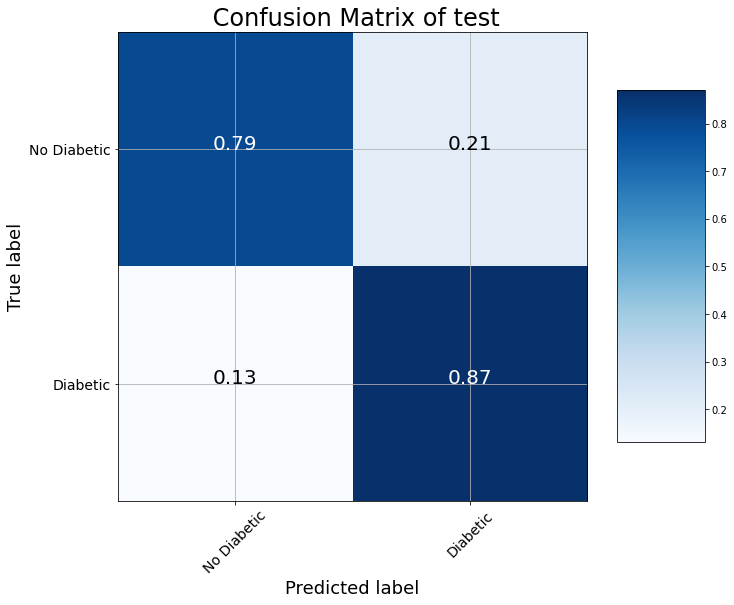

In [66]:
# TO PRINT FINAL RESULTS
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(yb, y_pred6)
plot_confusion_matrix(cm, classes = ['No Diabetic', 'Diabetic'],
                      title = ' Confusion Matrix of test')

plt.savefig('cm.png')

from sklearn.metrics import classification_report, confusion_matrix
cmat = confusion_matrix(yb, y_pred6)
print("TN:", format(cmat[0,0])," FP:", format(cmat[0,1]),  " FN:", format(cmat[1,0]), " TN:", format(cmat[1,1]), 
          " FNR=", format(cmat[1,0]/(cmat[1,0]+cmat[0,0])),  " FPR=", format(cmat[0,1]/(cmat[0,1]+cmat[1,1])))

print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))